# Customer Clustering with K-Means
You work for an e-commerce company, and your task is to group customers into distinct clusters based 
on their shopping behavior and preferences using the K-Means clustering algorithm. The dataset contains 
customer information, purchase history, and browsing data. Your goal is to create customer clusters for 
targeted marketing and personalized recommendations. Answer the following questions based on this 
case study:
1. Data Exploration:
a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe 
the features and the data distribution.
b. Discuss the importance of customer clustering in the e-commerce industry.
2. Data Preprocessing:
a. Prepare the customer data for clustering. Discuss the steps involved in data preprocessing, such 
as scaling, handling missing values, and encoding categorical variables.
3. Implementing K-Means:
a. Implement the K-Means clustering algorithm using Python libraries like scikit-learn to cluster 
customers based on their features.
b. Choose an appropriate number of clusters (K) for the algorithm and explain your choice.
4. Model Training:
a. Train the K-Means model using the preprocessed customer dataset.
b. Discuss the distance metric used for cluster assignment and its significance in customer 
clustering.
5. Customer Clustering:
a. Assign customers to their respective clusters based on their features.
b. Visualize the customer clusters and analyze the characteristics of each cluster.
6. Performance Metrics:
a. Explain the concept of silhouette score and how it is used to evaluate the quality of clustering.
b. Calculate the silhouette score for the customer clusters and interpret the results.
7. Hyperparameter Tuning:
a. Describe the impact of the number of clusters (K) on the performance of K-Means and suggest 
strategies for selecting the optimal value of K.
b. Conduct hyperparameter tuning for the K-Means model and discuss the impact of different 
values of K on clustering results.
8. Real-World Application:
a. Describe the practical applications of customer clustering in the e-commerce industry.
b. Discuss how customer clustering can lead to improved customer engagement, targeted 
marketing, and personalized recommendations.
9. Model Limitations:
a. Identify potential limitations of the K-Means clustering algorithm in customer segmentation 
and discuss scenarios in which it may not perform well.
10. Presentation and Recommendations:
a. Prepare a presentation or report summarizing your analysis, results, and recommendations for 
the e-commerce company. Highlight the significance of customer clustering and the role of KMeans in personalized marketing.
In this case study, you are required to demonstrate your ability to use the K-Means clustering algorithm 
for customer segmentation, understand the importance of performance metrics like silhouette score, and 
communicate the practical applications of customer clustering in the e-commerce sector

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [4]:
data = pd.read_csv("C://Users//TmC//Downloads//Mall_Customers.csv")

In [5]:
#Let's see how our data looks like!

data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Let's get some more information about our dataset.

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: >

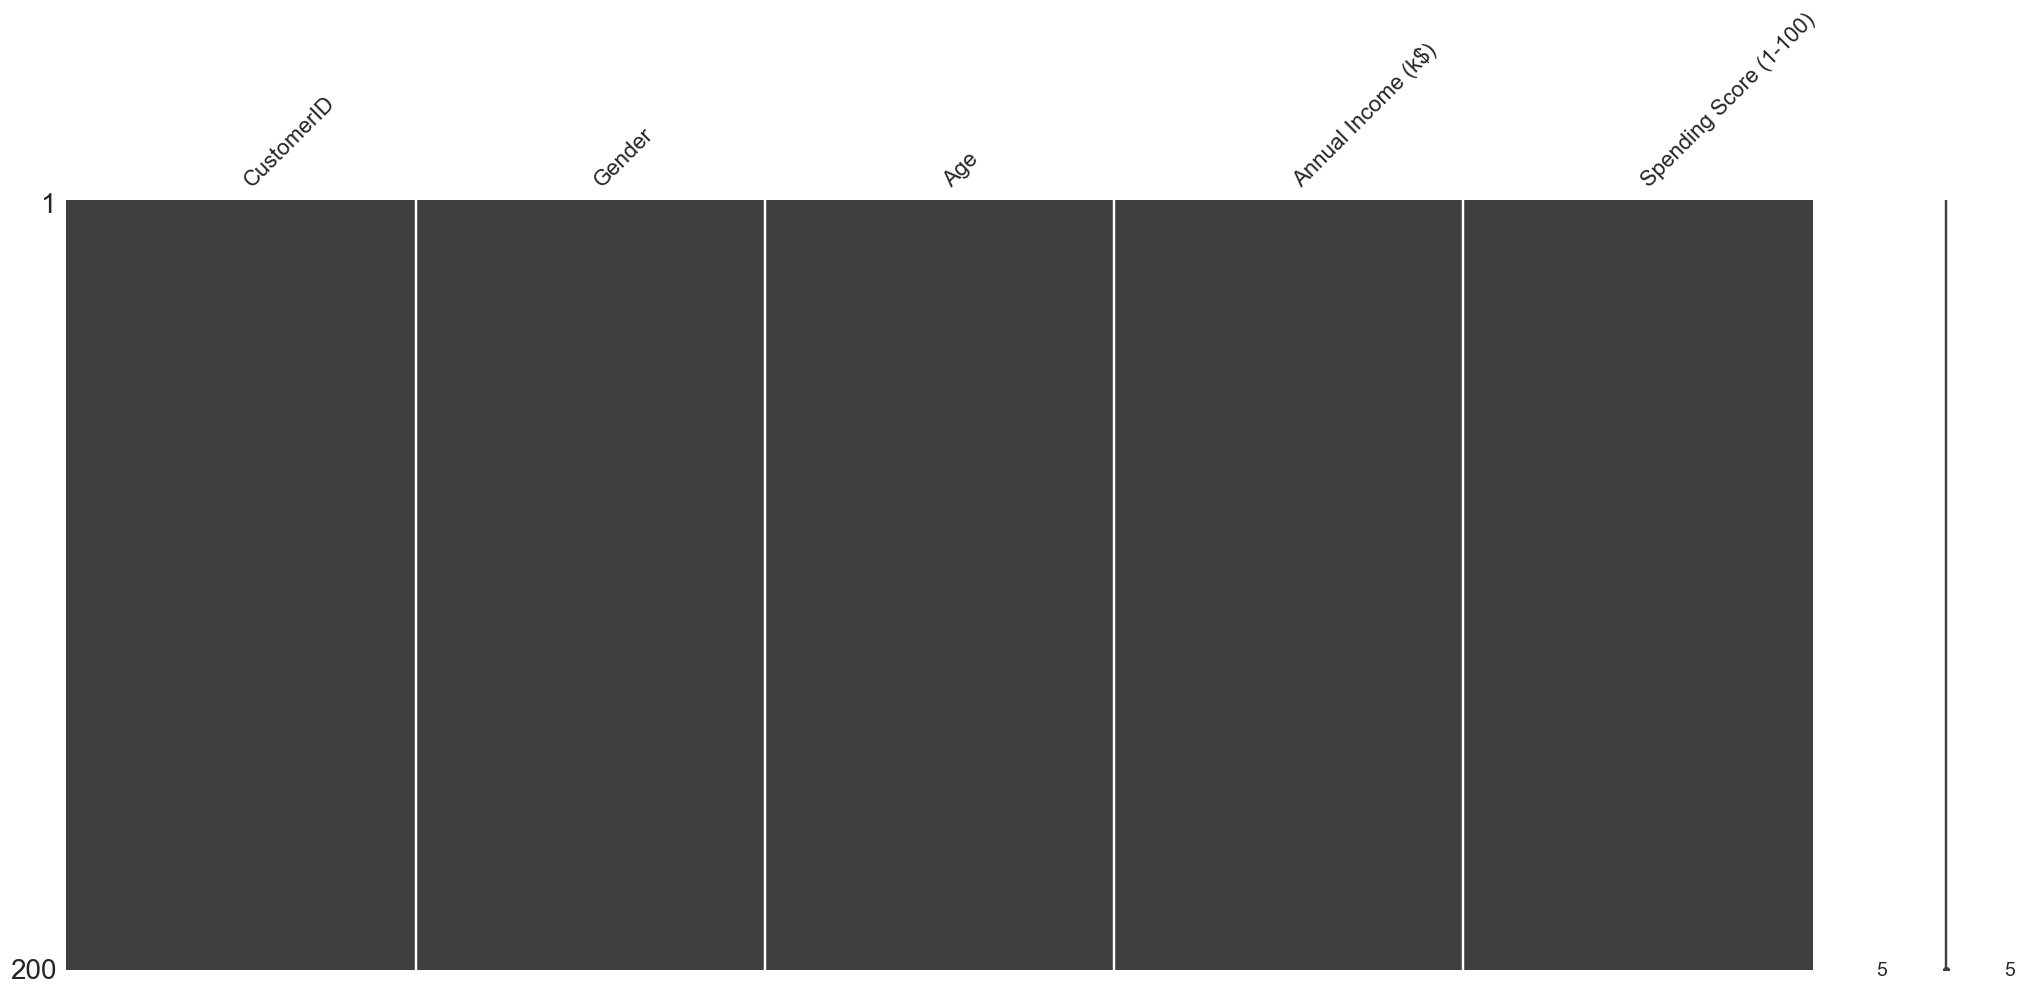

In [7]:
import missingno as mn
mn.matrix(data)

# Plotting the data:

Text(0, 0.5, 'Spending Score')

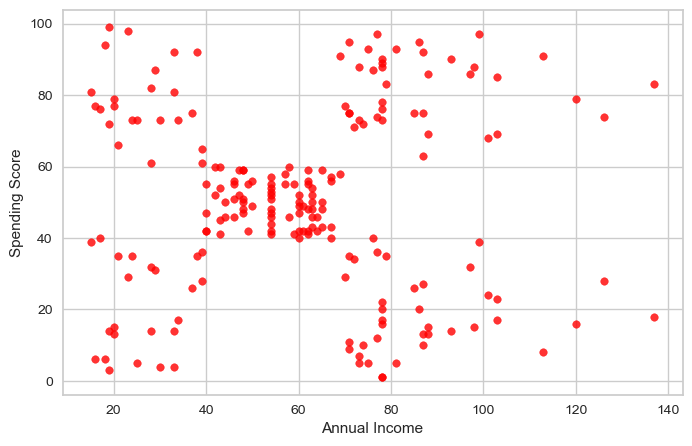

In [8]:
plt.figure(figsize=(8,5))
plt.scatter('Annual Income (k$)','Spending Score (1-100)',data=data, s=30, color="red", alpha = 0.8)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# Rescaling

In [9]:
x= data.iloc[:,3:5]

x_array =  np.array(x)
print(x_array)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [10]:
scaler = StandardScaler() 

x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# Determine K-value
1) Elbow-Method using WCSS(Within Cluster Sum of Squares):

In [12]:
# Fitting the model for values in range(1,11)

SSD =[]
K = range(1,11)

for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(x_scaled)
    SSD.append(km.inertia_)

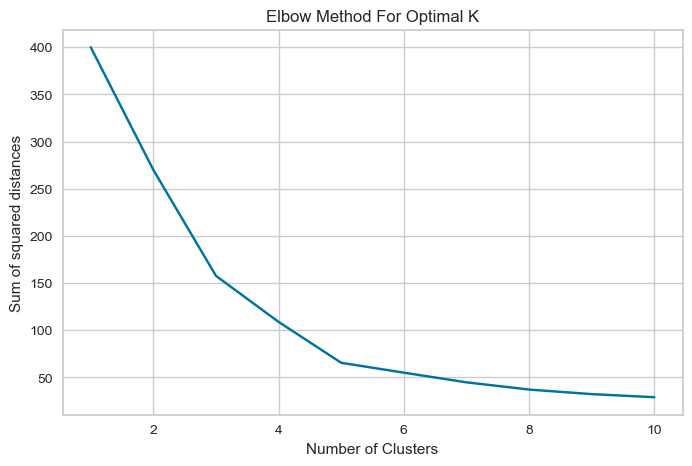

In [13]:
#plotting Elbow
plt.figure(figsize=(8,5))
plt.plot(K, SSD, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal K')
plt.show()

# 2) Silhouette Coefficient Method:

In [14]:
KMean= KMeans(n_clusters=5)
KMean.fit(x_scaled)
label=KMean.predict(x_scaled)

print("Silhouette Score(n=5):",silhouette_score(x_scaled, label))

Silhouette Score(n=5): 0.5546571631111091


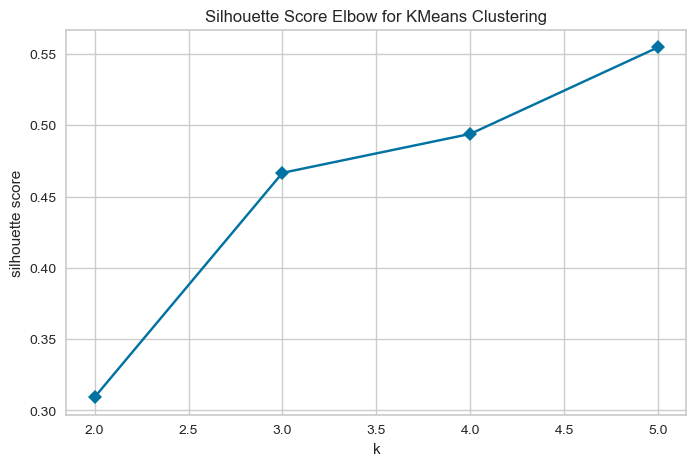

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [15]:
model = KMeans(random_state=123)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
Visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)
plt.figure(figsize=(8,5))
# Fit the data and visualize
Visualizer.fit(x_scaled)    
Visualizer.poof()

# For more read on KElbowVisualizer:

In [16]:
print(KMean.cluster_centers_)

[[-1.30751869 -1.13696536]
 [ 0.99158305  1.23950275]
 [ 1.05500302 -1.28443907]
 [-1.32954532  1.13217788]
 [-0.20091257 -0.02645617]]


In [17]:
print(KMean.labels_)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 4 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 4 1 2 1 2 1 4 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [18]:
#Add cluster results columns to the dataset dataframe

data["cluster"] = KMean.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


<function matplotlib.pyplot.show(close=None, block=None)>

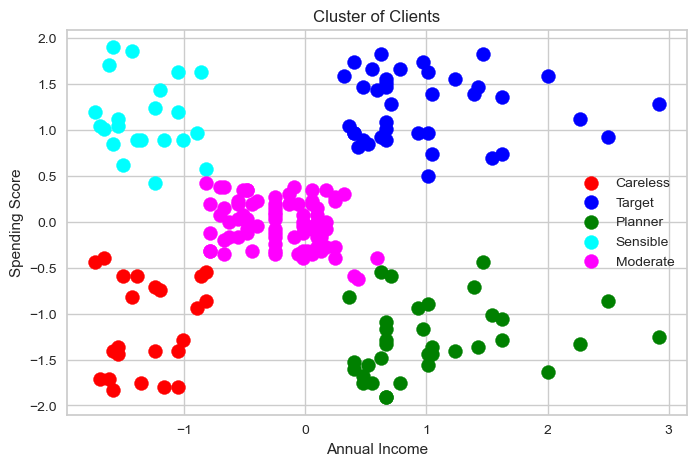

In [19]:
plt.figure(figsize=(8,5))

plt.scatter(x_scaled[label==0, 0], x_scaled[label==0, 1], s=100, c='red', label ='Careless')
plt.scatter(x_scaled[label==1, 0], x_scaled[label==1, 1], s=100, c='blue', label ='Target')
plt.scatter(x_scaled[label==2, 0], x_scaled[label==2, 1], s=100, c='green', label ='Planner')
plt.scatter(x_scaled[label==3, 0], x_scaled[label==3, 1], s=100, c='cyan', label ='Sensible')
plt.scatter(x_scaled[label==4, 0], x_scaled[label==4, 1], s=100, c='magenta', label ='Moderate')

plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show